## Recortei algumas imagens em suas diferentes labels (imagens so de plantacao, so de floresta etc)

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os.path import isfile, join
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt_h,prewitt_v

from sklearn import preprocessing

path = 'imagens/simple-shapes/data'
#path = 'imagens/testes_scikit'
imagens = []
x = []
plots = []
y = []
img_contorno = []


for file in  os.listdir(path):
    
    
##### ESSA PARTE EH SOH USADA PRA EXTRAIR LABEL NO CASO DO BANCO DE DADOS DE PECINHA DE LEGO #####    
    
    #print(join(path, file))
#     a=0

#     #print(len(file))
#     for i in range(len(file)):
#         if file[i].isnumeric(): #pega so os numeros do comeco pra caracterizar a peca
#             a=a+1
#         else:
#             break   #assim que vem algo diferente de numero sai do laco

#   SALVANDO POR INTENSIDADE DE PIXEL    

    y.append(file[0:4])
    imagem = cv2.imread(join(path, file),cv2.IMREAD_GRAYSCALE)
    imagens.append(imagem)
    try:
        imagem = cv2.resize(imagem, (50,50), interpolation = cv2.INTER_AREA)
    except:
        print('erro no arquivo', file)
        
    #plt.imshow(imagem, cmap = None)
    #plt.show()
    
    imagem = np.array(imagem).flatten()
    #x.append(imagem)
 
# ###  SALVANDO POR CONTORNO

    image = cv2.imread(join(path, file),cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(image)
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(image)
    img_contorno.append(edges_prewitt_vertical)
    
    
#     plt.imshow(edges_prewitt_vertical, cmap='gray')
#     plt.show()
    
    edges_prewitt_vertical = np.array(edges_prewitt_vertical).flatten()
    
    
    intens_contorno = np.concatenate((imagem, edges_prewitt_vertical))
    x.append(intens_contorno)
    


print(len(x[1]))

## x = Matriz no formato pronto pro treinamento
## edges_prewitt_vertical = imagem de contorno, mas tem que dar imshow antes do flatten
## imagem = imagem normal em preto e branco

## estou concatenando os dois vetores, por intensidade de pixel e por contorno, em um array so e mandando pro treinamento

5000


## criando as labels a partir das letras iniciais e fazendo encoder

In [253]:
print(y)
le = preprocessing.LabelEncoder()
encoded_value = le.fit_transform(y)
print(encoded_value)
#y = ['mata','mata','plantio','mata','plantio','mata', 'plantio', 'construcao', 'lago', 'plantio', 'plantio', 'lago','plantio']

['elli', 'circ', 'circ', 'tria', 'elli', 'circ', 'squa', 'rect', 'squa', 'circ', 'elli', 'circ', 'elli', 'tria', 'tria', 'rect', 'elli', 'squa', 'tria', 'elli', 'tria', 'squa', 'tria', 'circ', 'circ', 'squa', 'rect', 'elli', 'elli', 'rect', 'tria', 'tria', 'rect', 'circ', 'rect', 'elli', 'tria', 'tria', 'tria', 'elli', 'circ', 'elli', 'circ', 'elli', 'elli', 'circ', 'tria', 'circ', 'elli', 'circ', 'squa', 'squa', 'tria', 'elli', 'rect', 'rect', 'tria', 'tria', 'elli', 'circ', 'squa', 'circ', 'squa', 'elli', 'tria', 'elli', 'elli', 'rect', 'squa', 'rect', 'rect', 'circ', 'squa', 'circ', 'tria', 'rect', 'tria', 'tria', 'rect', 'tria', 'elli', 'squa', 'tria', 'rect', 'elli', 'circ', 'elli', 'tria', 'elli', 'tria', 'elli', 'circ', 'squa', 'tria', 'tria', 'elli', 'squa', 'rect', 'tria', 'tria', 'elli', 'rect', 'rect', 'circ', 'tria', 'squa', 'circ', 'circ', 'tria', 'rect', 'rect', 'circ', 'rect', 'rect', 'squa', 'elli', 'circ', 'circ', 'rect', 'tria', 'circ', 'tria', 'elli', 'rect', 'circ',

In [43]:
print(len(imagens))
print(len(y))


40000
40000


In [254]:
import random
from sklearn import ensemble

y = encoded_value
#x = imagens
sample_index=random.sample(range(len(x)),int(len(x)/5)) #20-80
valid_index=[i for i in range(len(x)) if i not in sample_index]

In [255]:
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Forest Classifier
classifier = ensemble.RandomForestClassifier(n_estimators = 5)

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print('Random Tree Classifier:\n')
print ('Score\t'+str(score))

Random Tree Classifier:

Score	0.4325


['mata']


<Figure size 432x288 with 0 Axes>

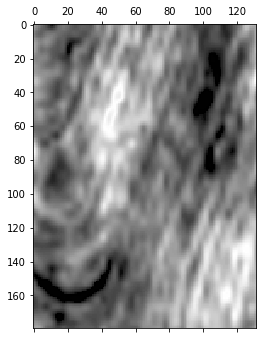

In [175]:
import pandas as pd
import numpy as np

i=13
plt.gray() 

plt.matshow(imagens[i])
x[i] =x[i].reshape(1,-1)
print(classifier.predict(x[i]))

In [256]:
from sklearn.neural_network import MLPClassifier

sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#USANDO REDE NEURAL
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500,200,100,10,5), random_state=1, max_iter=1000, 
                    learning_rate_init=0.01)
clf.fit(sample_images, sample_target)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 200, 100, 10, 5),
              learning_rate='constant', learning_rate_init=0.01, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [257]:
clf.score(valid_images, valid_target)

0.2125

In [ ]:
# #22 por cento
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(54, 36, 18), random_state=1, max_iter=1000, 
#                     learning_rate_init=0.01)
# clf.fit(sample_images, sample_target)

['3002']


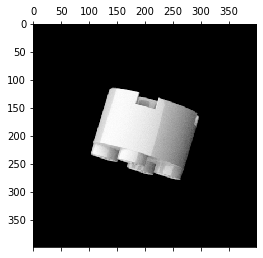

In [194]:
i = 1000
#clf.predict(x[1])
plt.matshow(imagens[i])
x[i] =x[i].reshape(1,-1)
print(clf.predict(x[i]))
#clf.score(valid_images, valid_target)